<h1><center>Laboratorio 4: ¿Superhéroe o Villano? 🦸</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nelson Bruno Moreno Cabañas


### **Link de repositorio de GitHub:** `https://github.com/Bruno-Moreno/LabProgra`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Clasificación con texto.
- Clasificación en `scikit-learn`.
- Modelos a través del uso de `pipeline`.
- Optimización de modelos usando `GridSearchCV`.

## Reglas:

- Fecha de entrega: 4/06/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar las ventajas que nos ofrece crear un pipeline.
- Obtener caracteristicas desde texto.
- Crear modelos de clasificación de texto.
- Optimizar la clasificación de texto usando wordclouds.
- Usar herramientas de visualización de texto como las wordclouds.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [1]:
# Librería Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# Librería para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Proyecciones en baja dimensionalidad: UMAP
!pip install umap-learn

# Librería para NLP
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

Requirement already up-to-date: plotly in c:\users\bruno\anaconda3\lib\site-packages (4.14.3)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 1. ¿Quien es Bat Cow?

<p align="center">
  <img src="https://static.wikia.nocookie.net/p__/images/a/a2/Bat-Cow.jpg/revision/latest?cb=20180108185037&path-prefix=protagonist" width="350">
</p>

En vez de estar oprotunamente desarrollando las tareas y las evaluaciones correspondientes al curso, su profesor de catedra y su auxiliar discuten acerca la alineación del personaje de ficción *Bat-Cow*. 

El cuerpo docente, no logra ponerse de acuerdo acerca de la alineación del personaje, es decir, si lucha junto a las fuerzas del bien, si neutral a cualquier eventualidad o derechamente es un villano.
El auxiliar plantea (de forma superficial) que *Bat-cow* posee una siniestra mirada, común característica de los personajes malvados. 
Por otra parte, extendiendo las ideas de Rousseau, el profesor (*se cree filósofo... y*) plantea que tal como los humanos no nacen malos, no existe motivo por el cual un rumiante humanizado con superpoderes deba serlo.

Sin embargo, ambos concuerdan en es difícil estimar la alineación solo usando los atributos físicos, por lo que creen el análisis debe ser complementado aún más antes de comunicarle los resultados a su estudiantado. Buscando más información, ambos sujetos se percatan de la existencia de un excelente antecedente para estimar la alineación: la historia personal de cada superhéroe o villano.

Es por esto le solicitan que construya y optimice un clasificador basado en texto el cual analice la alineación de cada personaje basado en su historia personal.

Para este laboratorio deben trabajar con los datos `df_comics.csv` y `comics_no_label.csv` subidos a u-cursos. El primero es un conjunto de datos que les servirá para entrenar un modelo de clasificación, mientras que el segundo es un dataset con personajes de ficción no etiquetados a predecir (sí, aquí está la misteriosa Batcow).

Para iniciar este laboratorio, cargue los dataset señalados y visualice a través de la función `head` los atributos que poseen cada uno de los dataset.


In [2]:
df_comics = pd.read_csv('df_comics.csv')
df_comics_no_label = pd.read_csv('comics_no_label.csv')

## 1.1 Obtención de Features [2 puntos]

<p align="center">
  <img src="https://media0.giphy.com/media/eIUpSyzwGp0YhAMTKr/200.gif" width="300">
</p>

Su primera tarea consiste en generar un vector de características para el atributo `history_text`. En este atributo se presenta una breve descripción de la historia de cada uno de los personajes de ficción presentes en el dataset (si un personaje tiene este atributo nulo, elimínelo). Luego, para obtener características de texto aplique el modelo de conteo `bag of words` de la siguiente forma:

- Utilice `CountVectorized` junto al tokenizador (que le proveemos) `LemmaTokenizer`.
- Obtenga caracteristicas de los 1-gramas y 2-gramas del texto (ver clase).
- Fijar un maximo de 10.000 caracteristicas para el vector de salida.

Finalmente, aplique `MinMaxScaler()` sobre `atributos_de_interes` y concatene el valor obtenido con el matriz de caracteristicas obtenidas con bag of words.

```python
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
```

No es necesario que obtenga un dataframe en concreto con las características solicitadas. Se le recomienda generar un `ColumnTransformer()` para aplicar las transformaciones solicitadas en un pipeline.

**To-Do:**
- [X] Obtener a traves de bag of words caracteristicas del resumen de historia de cada personaje.
- [X] Aplicar MinMaxScaler sobre los atributos de interes.

In [3]:
#### Código aquí ####
df_comics = df_comics.dropna(subset = ["history_text"]) #Eliminamos todos las nan del de history_test
df_comics["history_text"].isna().sum() 

0

In [4]:
stop_words = stopwords.words('english')

class LemmaTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

In [5]:
#Aplicamos ahora el bag of words
vectorizer = CountVectorizer(tokenizer= LemmaTokenizer(), max_features = 10000, ngram_range=(1,2)) 

atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score',
                        'durability_score', 'power_score', 'combat_score'] #A estos les aplicamos minmaxscaler

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('bow',  vectorizer, 'history_text'),
        ('MinMaxScaler', MinMaxScaler(), atributos_de_interes)])

preprocessing_transformer.fit_transform(df_comics)


<1285x10006 sparse matrix of type '<class 'numpy.float64'>'
	with 343562 stored elements in Compressed Sparse Row format>

## 1.2 Diseño de Pipeline y  Primer Entrenamiento [1.5 puntos]


<p align="center">
  <img src="https://pa1.narvii.com/6374/9eaec1b7bf9157334151452a669516f9a78b954c_hq.gif" width="300">
</p>


A continuación, genere un Pipeline con las caracteristicas solicitadas en la sección 1.1, añadiendo un reductor de dimensionalidad llamado `TruncatedSVD()` ajustando el número de componentes en 1000 (este reducto de dimensionalidad es similar al PCA pero funciona para vectores dispersos) y un clasificador `MultinomialNB()` por defecto.  Luego, separe el conjunto de datos en un conjunto de entrenamiento y prueba, donde el etiquetado vendrá dado por el atributo `alignment`. Finalmente entrene el modelo y reporte el desempeño con un `classification_report`. ¿ Nos recomendaría predecir la alineación de BatCow con este clasificador?.

**Nota:** Debido al desbalance que existe entre las clases, puede ser util aplicar método de [`imbalanced-learn`](https://github.com/scikit-learn-contrib/imbalanced-learn) como RandomOverSampler sobre los datos de entrenamiento. 

**To-DO:**
- [X] Realizar un pipeline con las caracteristicas solicitadas en 1.1,aplicar un reductor de dimensionalidad `TruncatedSVD` y aplicar un clasificador  `MultinomialNB()`.
- [X] Entrenar el pipeline.
- [X] (Opcional - **0.5 bonus**) Utilizar técnicas de Sampling para balancear los datos de entrenamiento.


In [6]:
#### Código aquí ####
baseline = Pipeline(steps=[("preprocessing", preprocessing_transformer), 
                           ("clf", MultinomialNB())])
y = df_comics["alignment"]
X = df_comics.drop(columns = ["alignment"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=666)


baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

In [7]:
baseline_clf_report = classification_report(y_test, y_pred)
print(baseline_clf_report)

              precision    recall  f1-score   support

         Bad       0.53      0.72      0.61       133
        Good       0.79      0.68      0.73       255
     Neutral       0.29      0.19      0.23        37

    accuracy                           0.65       425
   macro avg       0.54      0.53      0.52       425
weighted avg       0.66      0.65      0.65       425



In [8]:
### Este es el código cuando se implementa Sampling ###
from imblearn.pipeline import make_pipeline

baseline_2 = make_pipeline(preprocessing_transformer,RandomOverSampler(),MultinomialNB()) #Igual que antes pero usamos ROS

baseline_2.fit(X_train, y_train)
y_pred = baseline_2.predict(X_test)

In [9]:
baseline_clf_report = classification_report(y_test, y_pred)
print(baseline_clf_report)

              precision    recall  f1-score   support

         Bad       0.51      0.68      0.58       133
        Good       0.78      0.65      0.71       255
     Neutral       0.29      0.27      0.28        37

    accuracy                           0.63       425
   macro avg       0.53      0.53      0.52       425
weighted avg       0.65      0.63      0.63       425



## 1.3 Entrenamiento con Grid Search [2 Puntos]

<p align="center">
  <img src="https://media1.tenor.com/images/70fdfeea52a8e2e4505498c230a0d2f9/tenor.gif?itemid=5134219" width="250">
</p>

No conformes con el rendimiento obtenido en la sección 1.2, el cuerpo docente les pide que realicen una búsqueda de grilla de los mejores hiperparámetros utilizando `GridSearchCV`. 

Para esto, se le solicita que defina al menos 3 configuraciones de hiperparámetros e intente obtener mejores resultados que los obtenidos en la sección anterior. 

A continuación, un ejemplo de parametros para GridSearch:

```python
params = [
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator1.
  # en este caso se entrenará el clasificador 1 con combinaciones de todos los 
  # parámetros de bow__max_features, bow__ngram_range, clf__n_estimators 
  # y se seleccionará la mejor combinación.
  {
  'bow__max_features': [5000, 10000, ...],
  'bow__ngram_range': [(1, 1), (1, 2), (1,3)],
  ...,
  'clf': [classificator1()],
  'clf__n_estimators': [200]
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator2:
  {'clf': [classificator2()],
   'clf__penalty': ['ovr'],
   'clf__multi_class': ['liblinear']
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator3:
  {'clf': [classificator3()]
  }
             ]
```

Además, note que puede obtener todos los parámetros configurables de un pipeline invocando sobre este el método `.get_params()`.

**Nota:** El GridSearch puede tomar tiempos de búsqueda exorbitantes, por lo que se le recomienda dejar corriendo el código y tomarse un tecito.

In [10]:
#### Código aquí ####
from sklearn.model_selection import ParameterGrid
from nltk.stem import SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer

nltk_tokenizer = ToktokTokenizer()
snowball = SnowballStemmer(language="english")

def tokenize(text):
    tokens = nltk_tokenizer.tokenize(text)
    stems = [snowball.stem(token) for token in  nltk_tokenizer.tokenize(tokens)]
    return stems


grid = {
    "preprocessing__bow__max_features": range(1000, 10000, 1000),
    "preprocessing__bow__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "preprocessing__bow__tokenizer": [LemmaTokenizer(),tokenize], 
}

best_score = 0

for g in ParameterGrid(grid):
    baseline.set_params(**g)
    baseline.fit(X_train, y_train)
    y_pred = baseline.predict(X_test)
    score = f1_score(y_test, y_pred, average="macro")
    if score > best_score:
        best_score = score
        best_grid = g

print("OOB: %0.5f" % best_score)
print("Grid:", best_grid)

OOB: 0.53769
Grid: {'preprocessing__bow__max_features': 7000, 'preprocessing__bow__ngram_range': (1, 1), 'preprocessing__bow__tokenizer': <__main__.LemmaTokenizer object at 0x000001CFF17B8F40>}


#### 1.3.1 Mejor configuración [0.5]

Comente cual fue la mejor configuración obtenida por Grid Search y por qué cree que esta fue la mejor.

> La mejor configuración fue la obtenida con max features = 7000, bow ngram range (1,1) y lemmatokenizer(). El valor de max_features óptimo habla de la cantidad de palabras frecuentes máxima que debe tener un modelo de buen rendimiento, en este caso, 7000 es el valor óptimo. El ngram range de (1,1) indica que los unigramas son lo más importante para la clasificación, presuntamente porque hay palabras clave que caracterizan heroes, villanos y neutrales. Finalmente, lemmatokenizer extrae las stopwords de la clasificación lo cual mejora considerablemente el rendimiento.

## 1.4 Predicción del datos sin etiquetado

<p align="center">
  <img src="https://pbs.twimg.com/media/DolotxUUYAAbg7f.jpg" width="350">
</p>


Llego el momento de predecir cual es la verdadera alineación de `Batcow`. Para esto, deben escoger el mejor pipeline obtenido en las secciones anteriores y predecir la alineación de todos los datos presentes en `df_comics_no_label`.Luego, anexen las alineaciones obtenidas a su correspondiente columna  del dataframe original (atributo `alignment`) y busquen a los flamantes personajes `Batcow`, `Vergil`, y `Gorilla Girl'. Presente los resultados en un `Dataframe`.

**Nota:** Recuerde que pueden existir campos vacios en `history_text`, por lo que se les recomienda borrar los nan.

In [11]:
#### Código aquí ####
df_comics_no_label.head()

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,14,Ace Morgan,Kyle Morgan,NaN,7,NaN,"Aviation: Ace is an extremely skilled pilot, ...",85,20,65,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,17,A'dal,NaN,NaN,7,"As with most of the naaru, little is known of ...",NaN,85,30,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,Agent Zero (FOX),David North,NaN,6,"During mid-late 1973, Zero was a member of Tea...",Zero can absorb kinetic energy to further incr...,90,10,25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31,Ajax (FOX),Francis,Francis Freeman,7,Ajax (born Francis Freeman) was a human who ga...,Ajax has claimed that the procedure to obtain ...,85,25,45,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [12]:
df_comics_no_label = df_comics_no_label.dropna(subset = ["history_text"]) #Eliminamos todos las nan del de history_test
df_comics_no_label["history_text"].isna().sum() 

0

In [13]:
#Hacemos las predicciones
baseline.set_params(**best_grid) #Seteamos en el modelo los mejores hiperparámetros
baseline.fit(X_train, y_train) #Entrenamos el modelo 
y_pred = baseline.predict(df_comics_no_label.drop(columns=["alignment"])) #Predecimos en el conjunto df_comics_no_label

In [14]:
df_comics_no_label["alignment"] = y_pred #Agregamos la predicción en la columna de df_comics_no_label 
#Ahora veamos a los flamantes personajes, creemos el filtro
Batcow = df_comics_no_label["name"] == "Batcow"
Vergil = df_comics_no_label["name"] == "Vergil"
Gorilla_Girl = df_comics_no_label["name"] == "Gorilla Girl"
filtro = (Batcow | Vergil | Gorilla_Girl) 

#Aplicamos el filtro 
df_comics_no_label.loc[filtro,["name","history_text","alignment"]]

,name,history_text,alignment
16,Batcow,Bat-Cow was originally a cow that was found by...,Neutral
40,Gorilla Girl,A carnival performer with the ability to turn ...,Bad
78,Vergil,"Vergil, later also known as Nelo Angelo, is on...",Neutral
83,Batcow,Bat-Cow was originally a cow that was found by...,Neutral


> Ni idea por qué aparece 2 veces la batcow, debe estar repetida en el dataset 

### Wordclouds [Opcional- 0,5] 

Una buena pero informal forma de comunicar los resultados del trabajo con texto es generar Wordclouds. Este tipo de visualizaciones nos informan de forma gráfica cuales son las palabras más frecuentes según el tamaño de estas al ser posicionadas en un lienzo.
<center>
<img alt='Ejemplo de una Wordcloud de Starwars' src='https://amueller.github.io/word_cloud/_images/sphx_glr_a_new_hope_001.png' width=400/>

Ejemplo de una Wordcloud de Starwars

</center>
Dicho esto, como equipo docente nos encantaría conocer cuales son las palabras que caracterizan tanto a heroes como neutrales y a villanos y cuales son sus principales diferencias. Por esta razón, les pedimos como última tarea generar una wordcloud con las historias de cada personaje según cada alineamiento (clase). Pueden ocupar el dataset completo para esto. 


**Nota:** Recuerde eliminar las stopwords. Guías completas para generar las wordclouds, eliminar las stopwords y configurar los parámetros de las nubes creadas pueden ser encontradas en su [documentación oficial](https://amueller.github.io/word_cloud/) y en [datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python).





In [15]:
#### Wordcloud para heroes ####
heroes = df_comics["alignment"] == "Good"
text = " ".join(df_comics.loc[heroes,"history_text"].tolist())

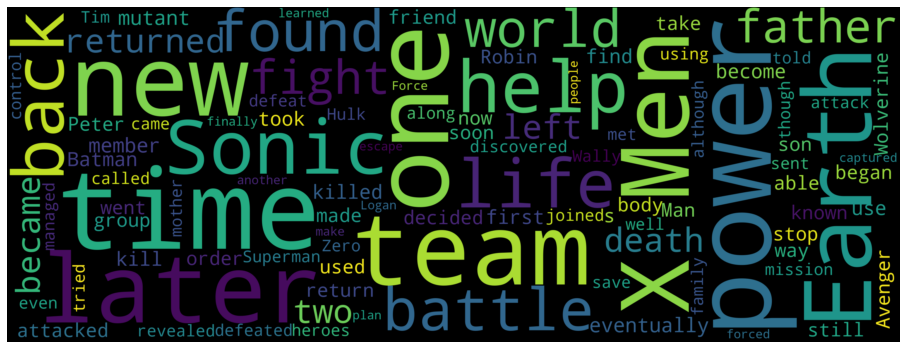

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = [16, 9]
# Create and generate a word cloud image:


wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

# Display the generated image:
plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

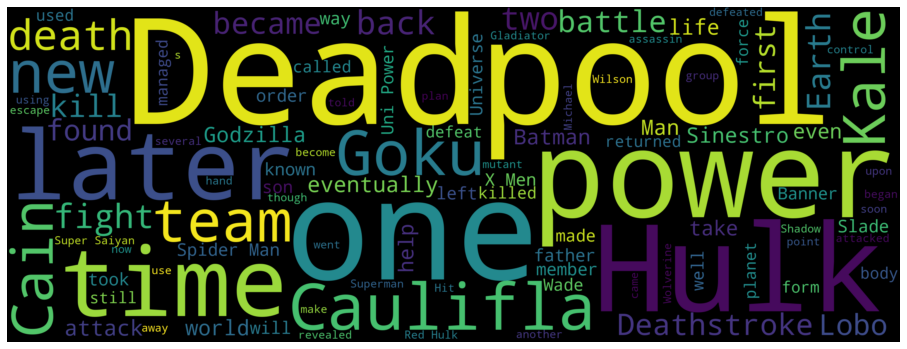

In [17]:
#### Wordcloud para neutrales ####
neutrales = df_comics["alignment"] == "Neutral"
text = " ".join(df_comics.loc[neutrales,"history_text"].tolist())

plt.rcParams["figure.figsize"] = [16, 9]
# Create and generate a word cloud image:


wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

# Display the generated image:
plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

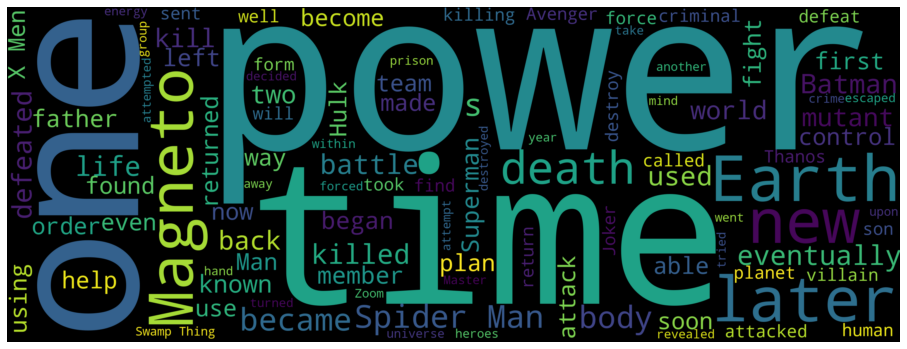

In [18]:
#### Wordcloud para villanos ####
villanos = df_comics["alignment"] == "Bad"
text = " ".join(df_comics.loc[villanos,"history_text"].tolist())

plt.rcParams["figure.figsize"] = [16, 9]
# Create and generate a word cloud image:


wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

# Display the generated image:
plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

Comente las principales diferencias entre las tres wordclouds.
¿Hay palabras que caracterizen a los grupos y que no aparezcan en los otros?

> Muchas de las palabras se encuentran presentes en los 3 wordclouds, las principales diferencias radican en la frecuencia con la que aparecen, por ejemplo power es mencionado fuertemente en los 3 wordclouds pero para los villanos es más frecuente (pues siempre buscan obtener más) de igual forma, también es más frecuente las palabras con connotación negativa como death, killed, killing etc... Para los heores en cambio, aparecen palabras que no aparecen en los otros como team o help e incluso aparecen más frecuentes que en los otros como earth, life, world (pues los heroes hacen este tipo de cosas). Finalmente para neutrales, no hay mucho que concluir pues presentan palabras de los otros wordclouds. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab, solo para tareas**. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>